# 03. Convolution Neural Networks and Computer Vision with TensorFlow

Going to cover:
* Getting a dataset to work
* Architecture of convolution neural network
* A quick end-to-end example
* Steps in modelling for binary image classification with CNNs
    * Becoming one with the data
    * Preparing data for modelling
    * Creating a CNN model
    * Fitting a model
    * Evaluating a model
    * Improving a model
    * Making a prdiction with trained model
* Steps in modelling for multi-class image clasfication with CNNs
* Same as above (With different dataset)

## Get the data

In [6]:
import os

# pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("data"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'data'.
There are 2 directories and 0 images in 'data\test'.
There are 0 directories and 250 images in 'data\test\pizza'.
There are 0 directories and 250 images in 'data\test\steak'.
There are 2 directories and 0 images in 'data\train'.
There are 0 directories and 736 images in 'data\train\pizza'.
There are 0 directories and 750 images in 'data\train\steak'.


In [7]:
# Check the number of images in each directory
for dirpath, dirnames, filenames in os.walk("data"):
    print(f"{dirpath} contains {len(filenames)} images.")

data contains 0 images.
data\test contains 0 images.
data\test\pizza contains 250 images.
data\test\steak contains 250 images.
data\train contains 0 images.
data\train\pizza contains 736 images.
data\train\steak contains 750 images.


In [8]:
# Get the classs names
import pathlib
import numpy as np
data_dir = pathlib.Path("data/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [9]:
# Visualize the data
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Setup the target directory
    target_folder = target_dir + target_class

    # Get a random image path
    random_img = random.sample(os.listdir(target_folder), 1)

    # Read the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_img[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}")

    return img

Image shape: (512, 512, 3)


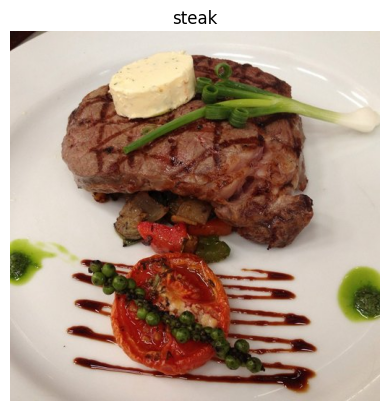

In [10]:
# View a random image from the training dataset
img = view_random_image(target_dir="data/train/", target_class="steak")

In [11]:
# View the img
img

array([[[ 29,  10,  12],
        [ 32,  13,  15],
        [ 34,  15,  17],
        ...,
        [223, 215, 202],
        [223, 215, 202],
        [223, 215, 202]],

       [[ 29,  10,  12],
        [ 32,  13,  15],
        [ 33,  14,  16],
        ...,
        [224, 216, 203],
        [224, 216, 203],
        [224, 216, 203]],

       [[ 28,  12,  13],
        [ 30,  14,  15],
        [ 31,  15,  15],
        ...,
        [224, 216, 203],
        [225, 217, 204],
        [225, 217, 204]],

       ...,

       [[207, 197, 188],
        [207, 197, 188],
        [206, 196, 187],
        ...,
        [202, 189, 173],
        [201, 188, 172],
        [201, 188, 172]],

       [[207, 197, 188],
        [207, 197, 188],
        [206, 196, 187],
        ...,
        [201, 188, 172],
        [200, 187, 171],
        [200, 187, 171]],

       [[208, 198, 189],
        [207, 197, 188],
        [207, 197, 188],
        ...,
        [200, 187, 171],
        [200, 187, 171],
        [199, 186, 170]]

In [12]:
# Check the shape of the image
img.shape

(512, 512, 3)

In [13]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 29,  10,  12],
        [ 32,  13,  15],
        [ 34,  15,  17],
        ...,
        [223, 215, 202],
        [223, 215, 202],
        [223, 215, 202]],

       [[ 29,  10,  12],
        [ 32,  13,  15],
        [ 33,  14,  16],
        ...,
        [224, 216, 203],
        [224, 216, 203],
        [224, 216, 203]],

       [[ 28,  12,  13],
        [ 30,  14,  15],
        [ 31,  15,  15],
        ...,
        [224, 216, 203],
        [225, 217, 204],
        [225, 217, 204]],

       ...,

       [[207, 197, 188],
        [207, 197, 188],
        [206, 196, 187],
        ...,
        [202, 189, 173],
        [201, 188, 172],
        [201, 188, 172]],

       [[207, 197, 188],
        [207, 197, 188],
        [206, 196, 187],
        ...,
        [201, 188, 172],
        [200, 187, 171],
        [200, 187, 171]],

       [[208, 198, 189],
        [207, 197, 188],
        [207, 197, 188],
        ...,
        [200, 187, 17

In [14]:
# Get all the pixel values between 0 and 1
img/255.

array([[[0.11372549, 0.03921569, 0.04705882],
        [0.1254902 , 0.05098039, 0.05882353],
        [0.13333333, 0.05882353, 0.06666667],
        ...,
        [0.8745098 , 0.84313725, 0.79215686],
        [0.8745098 , 0.84313725, 0.79215686],
        [0.8745098 , 0.84313725, 0.79215686]],

       [[0.11372549, 0.03921569, 0.04705882],
        [0.1254902 , 0.05098039, 0.05882353],
        [0.12941176, 0.05490196, 0.0627451 ],
        ...,
        [0.87843137, 0.84705882, 0.79607843],
        [0.87843137, 0.84705882, 0.79607843],
        [0.87843137, 0.84705882, 0.79607843]],

       [[0.10980392, 0.04705882, 0.05098039],
        [0.11764706, 0.05490196, 0.05882353],
        [0.12156863, 0.05882353, 0.05882353],
        ...,
        [0.87843137, 0.84705882, 0.79607843],
        [0.88235294, 0.85098039, 0.8       ],
        [0.88235294, 0.85098039, 0.8       ]],

       ...,

       [[0.81176471, 0.77254902, 0.7372549 ],
        [0.81176471, 0.77254902, 0.7372549 ],
        [0.80784314, 0

# A typical architecture of a Convolutional Neural Network

![CNN Architecture](https://miro.medium.com/max/2000/1*vkQ0hXDaQv57sALXAJquxA.jpeg)

Components of a CNN:
| **Hyperparameter/Layer type** | **What does it do?** | **Typical values** |
| ----- | ----- | ----- |
| Input image(s) | Target images you'd like to discover patterns in| Whatever you can take a photo (or video) of |
| Input layer | Takes in target images and preprocesses them for further layers | `input_shape = [batch_size, image_height, image_width, color_channels]` |
| Convolution layer | Extracts/learns the most important features from target images | Multiple, can create with [`tf.keras.layers.ConvXD`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) (X can be multiple values) |
| Hidden activation | Adds non-linearity to learned features (non-straight lines) | Usually ReLU ([`tf.keras.activations.relu`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu)) |
| Pooling layer | Reduces the dimensionality of learned image features | Average ([`tf.keras.layers.AvgPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D)) or Max ([`tf.keras.layers.MaxPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)) |
| Fully connected layer | Further refines learned features from convolution layers | [`tf.keras.layers.Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) |
| Output layer | Takes learned features and outputs them in shape of target labels | `output_shape = [number_of_classes]` (e.g. 3 for pizza, steak or sushi)|
| Output activation | Adds non-linearities to output layer | [`tf.keras.activations.sigmoid`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid) (binary classification) or [`tf.keras.activations.softmax`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) |

# An end-to-end example

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 and 1), and turn it into batches
train_datagen = ImageDataGenerator(rescale=1/255.)
valid_datagen = ImageDataGenerator(rescale=1/255.)

# Setup the train and test directories
train_dir = "data/train/"
test_dir = "data/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               batch_size=32,
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                                target_size=(224, 224),
                                                class_mode="binary",
                                                batch_size=32,
                                                seed=42)

# Create a CNN model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                         epochs=5,
                         steps_per_epoch=len(train_data),
                         validation_data=valid_data,
                         validation_steps=len(valid_data))

Found 1486 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


C:\Users\Dilun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


C:\Users\Dilun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 26s 482ms/step - accuracy: 0.6262 - loss: 0.6460 - val_accuracy: 0.8000 - val_loss: 0.4426
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5


C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 230ms/step - accuracy: 0.7901 - loss: 0.4470 - val_accuracy: 0.8500 - val_loss: 0.3553
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 225ms/step - accuracy: 0.8283 - loss: 0.3824 - val_accuracy: 0.8760 - val_loss: 0.3127
